# **Credit Card Fraud Detection**

# Importing necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
df_train.shape

(1296675, 23)

In [3]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df_train.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

**Checking if any missing values present in the dataset**

In [5]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

**Total genuine and fraud transactions**

<Axes: xlabel='is_fraud'>

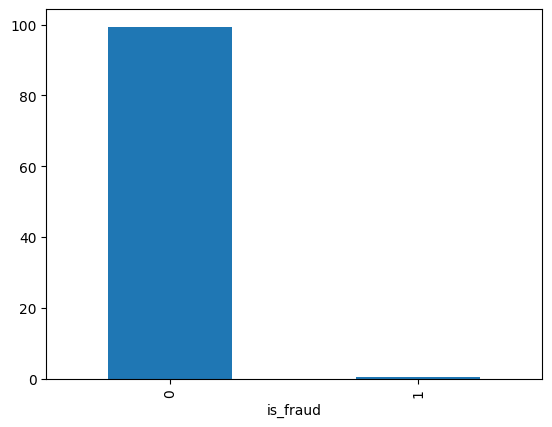

In [6]:
cnt =df_train['is_fraud'].value_counts()
prp = df_train['is_fraud'].value_counts(normalize =True)*100
t = pd.concat([cnt,prp],axis=1)
t.index=['Genuine','Fraud']
prp.plot(kind='bar')

**Checking for duplicated records**

In [7]:
df_train.duplicated().sum()

0

**The columns like 'cc_num', 'first', 'last', 'trans_num' don't provide significant relevant information related to fraud detection. So, we drop it.**

**Dropping few columns**

In [8]:
print(df_train.columns)
df_train.drop(['Unnamed: 0','first','last','trans_num','job'],axis = 1,inplace =True)
print(df_train.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


**We convert the transaction date and time to separate columns which includes hour, day of a week and month**

In [9]:
df_train['trans_date_trans_time'] = pd.to_datetime(df_train['trans_date_trans_time'])
df_train['Hour'] = df_train['trans_date_trans_time'].dt.hour
df_train['Day_of_week']= df_train['trans_date_trans_time'].dt.dayofweek
df_train['Month']=df_train['trans_date_trans_time'].dt.month

In [10]:
df_train['dob']=pd.to_datetime(df_train['dob'])
df_train['dob']

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1296670   1961-11-24
1296671   1979-12-11
1296672   1967-08-30
1296673   1980-08-18
1296674   1995-08-16
Name: dob, Length: 1296675, dtype: datetime64[ns]

# Mean amount in fraud and normal transactions

In [11]:
df_train.groupby('is_fraud')['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

***The mean amount for fradulent transaction was 531.32 whereas for normal transaction was relatively lower i.e 67.66***

# Frequency of Transactions

In [12]:
def last1dayTransCnt(df_train):
    temp = pd.Series(df_train.index,index=df_train.trans_date_trans_time,name="In_a_Day").sort_index()
    #data (parameter) is df_train.index 
    #temp is a series whose index is time stamp and value is row indices of corresponding time stamp
    In_a_Day = temp.rolling('1d').count()-1
#in a day is a series with timestamp as index and frequency as its value
    In_a_Day.index= temp.values
#in a day 's index is just 0 1 2; row indices of df_train or x
    df_train['In_a_Day'] = In_a_Day.reindex(df_train.index)
#df_train
    return df_train

In [13]:
def last1weekTransCnt(x):
    temp = pd.Series(x.index,index=x.trans_date_trans_time,name="In_a_Week").sort_index()
    In_a_Week = temp.rolling('7d').count()-1
    In_a_Week.index = temp.values
    x['In_a_Week'] = In_a_Week.reindex(x.index)
    return x

In [14]:
def last1monthTransCnt(x):
    temp = pd.Series(x.index,index=x.trans_date_trans_time,name="In_a_Month").sort_index()
    In_a_Month = temp.rolling('30d').count()-1
    In_a_Month.index = temp.values
    x['In_a_Month'] = In_a_Month.reindex(x.index)
    return x

In [15]:
df1d = df_train.groupby('cc_num').apply(last1dayTransCnt)
#drop = true ; we don't want to add new column
df1w = df1d.reset_index(drop=True).groupby('cc_num').apply(last1weekTransCnt)
df1dm = df1w.reset_index(drop=True).groupby('cc_num').apply(last1monthTransCnt)
df1dm

trans_date_trans_time               cc_num  \
cc_num                                                                   
60416207185         0         2019-01-01 12:47:15          60416207185   
                    1         2019-01-02 08:44:57          60416207185   
                    2         2019-01-02 08:47:36          60416207185   
                    3         2019-01-02 12:38:14          60416207185   
                    4         2019-01-02 13:10:46          60416207185   
...                                           ...                  ...   
4992346398065154184 1296670   2020-06-20 21:04:59  4992346398065154184   
                    1296671   2020-06-21 00:41:01  4992346398065154184   
                    1296672   2020-06-21 02:47:59  4992346398065154184   
                    1296673   2020-06-21 08:04:28  4992346398065154184   
                    1296674   2020-06-21 09:58:58  4992346398065154184   

                                                      merchant       category  \
cc_num                                                                          
60416207185         0        fraud_Jones, Sawayn and Romaguera       misc_net   
                    1                          fraud_Berge LLC  gas_transport   
                    2                       fraud_Luettgen PLC  gas_transport   
                    3                      fraud_Daugherty LLC      kids_pets   
                    4                     fraud_Beier and Sons           home   
...                                                        ...            ...   
4992346398065154184 1296670    fraud_Berge, Kautzer and Harris  personal_care   
                    1296671                 fraud_Bernhard Inc  gas_transport   
                    1296672      fraud_Reichert, Rowe and Mraz   shopping_net   
                    1296673                   fraud_Jewess LLC   shopping_pos   
                    1296674      fraud_Reilly, Heaney and Cole  gas_transport   

                                amt gender             street           city  \
cc_num                                                                         
60416207185         0          7.27      F   9886 Anita Drive  Fort Washakie   
                    1         52.94      F   9886 Anita Drive  Fort Washakie   
                    2         82.08      F   9886 Anita Drive  Fort Washakie   
                    3         34.79      F   9886 Anita Drive  Fort Washakie   
                    4         27.18      F   9886 Anita Drive  Fort Washakie   
...                             ...    ...                ...            ...   
4992346398065154184 1296670   60.47      M  920 Patrick Light        Mc Nabb   
                    1296671   74.29      M  920 Patrick Light        Mc Nabb   
                    1296672  246.56      M  920 Patrick Light        Mc Nabb   
                    1296673    2.62      M  920 Patrick Light        Mc Nabb   
                    1296674   39.29      M  920 Patrick Light        Mc Nabb   

                            state    zip  ...   unix_time  merch_lat  \
cc_num                                    ...                          
60416207185         0          WY  82514  ...  1325422035  43.974711   
                    1          WY  82514  ...  1325493897  42.018766   
                    2          WY  82514  ...  1325494056  42.961335   
                    3          WY  82514  ...  1325507894  42.228227   
                    4          WY  82514  ...  1325509846  43.321745   
...                           ...    ...  ...         ...        ...   
4992346398065154184 1296670    IL  61335  ...  1371762299  40.475395   
                    1296671    IL  61335  ...  1371775261  40.743634   
                    1296672    IL  61335  ...  1371782879  40.215418   
                    1296673    IL  61335  ...  1371801868  40.762861   
                    1296674    IL  61335  ...  1371808738  40.699593   

                             merc

# As per the frequency of transactions lets guess the fradulent transactions

Threshold for a certain transaction to be fraud estimated if no. of day, week or month is more that 90% of the data.

In [16]:
threshold_day = df1dm['In_a_Day'].quantile(0.9)
threshold_week = df1dm['In_a_Week'].quantile(0.9)
threshold_month = df1dm['In_a_Month'].quantile(0.9)
df1dm['prolly_fraud'] = ((df1dm['In_a_Day']>threshold_day)|
                        (df1dm['In_a_Week']>threshold_week)|
                        (df1dm['In_a_Month']>threshold_month))
df1dm[(df1dm['prolly_fraud'] == True) & (df1dm['is_fraud'] == True)]


trans_date_trans_time               cc_num  \
cc_num                                                                   
501851115094        9228      2019-03-24 23:42:05         501851115094   
                    9229      2019-03-24 23:45:03         501851115094   
                    9230      2019-03-25 01:44:04         501851115094   
                    9231      2019-03-25 01:48:08         501851115094   
                    9232      2019-03-25 03:58:56         501851115094   
...                                           ...                  ...   
4792627764422477317 1270201   2019-12-24 22:06:59  4792627764422477317   
4810789809665942990 1275557   2020-04-16 03:13:29  4810789809665942990   
                    1275558   2020-04-16 22:14:36  4810789809665942990   
4855488158131690372 1279435   2020-03-12 23:48:29  4855488158131690372   
                    1279436   2020-03-13 13:30:47  4855488158131690372   

                                                       merchant  \
cc_num                                                            
501851115094        9228                      fraud_Schmitt Ltd   
                    9229                    fraud_Keeling-Crist   
                    9230           fraud_Rowe, Batz and Goodwin   
                    9231              fraud_Strosin-Cruickshank   
                    9232                       fraud_Harris Inc   
...                                                         ...   
4792627764422477317 1270201   fraud_Dare, Casper and Bartoletti   
4810789809665942990 1275557  fraud_Osinski, Ledner and Leuschke   
                    1275558                   fraud_Hills-Boyer   
4855488158131690372 1279435                   fraud_Goyette Inc   
                    1279436                    fraud_Schumm PLC   

                                  category      amt gender  \
cc_num                                                       
501851115094        9228          misc_net   757.36      F   
                    9229          misc_pos     6.33      F   
                    9230       grocery_pos   301.90      F   
                    9231       grocery_pos   282.54      F   
                    9232     gas_transport     7.97      F   
...                                    ...      ...    ...   
4792627764422477317 1270201      kids_pets    21.52      F   
4810789809665942990 1275557    grocery_pos   339.56      F   
                    1275558  personal_care    20.43      F   
4855488158131690372 1279435   shopping_net  1193.52      M   
                    1279436   shopping_net  1065.73      M   

                                         street          city state    zip  \
cc_num                                                                       
501851115094        9228       755 Moses Harbor    Coulee Dam    WA  99116   
                    9229       755 Moses Harbor    Coulee Dam    WA  99116   
                    9230       755 Moses Harbor    Coulee Dam    WA  99116   
                    9231       755 Moses Harbor    Coulee Dam    WA  99116   
                    9232       755 Moses Harbor    Coulee Dam    WA  99116   
...                                         ...           ...   ...    ...   
4792627764422477317 1270201     7952 Karen Pike       De Soto    KS  66018   
4810789809665942990 1275557    916 Charles Road   Bowersville    OH  45307   
                    1275558    916 Charles Road   Bowersville    OH  45307   
4855488158131690372 1279435  25887 Martin Inlet  Graniteville    VT   5654   
                    1279436  25887 Martin Inlet  Graniteville    VT   5654   

                             ...  merch_lat  merch_long  is_fraud Hour  \
cc_num                       ...                                         
501851115094        9228     ...  48.579050 -118.658233         1   23   
                    9229     ...  48.157637 -119.394795         1   23   
                    9230     ...  48.775604 -118.631265         1    1   
 

**Merged this dataframe's columns to original one**

In [17]:
"""df1dm has cc_num as index but we're trying to merge on basis of cc_num column as well
so we make cc_num a regular column before merging it"""
df1dm.reset_index(drop =True,inplace=True)
df_train = df_train.merge(df1dm[['trans_date_trans_time','prolly_fraud']], on = ['trans_date_trans_time'],how = 'left')
# df.drop(['prolly_fraud_x','prolly_fraud_y'], axis=1, inplace=True)
# df_train.head(3)

In [18]:
df_train.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,...,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,Hour,Day_of_week,Month,prolly_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,...,3495,1988-03-09,1325376018,36.011293,-82.048315,0,0,1,1,False
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,...,149,1978-06-21,1325376044,49.159047,-118.186462,0,0,1,1,False
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,...,4154,1962-01-19,1325376051,43.150704,-112.154481,0,0,1,1,False


# Correlation Heatmaps

**Correlation heatmap of original data**


<Axes: >

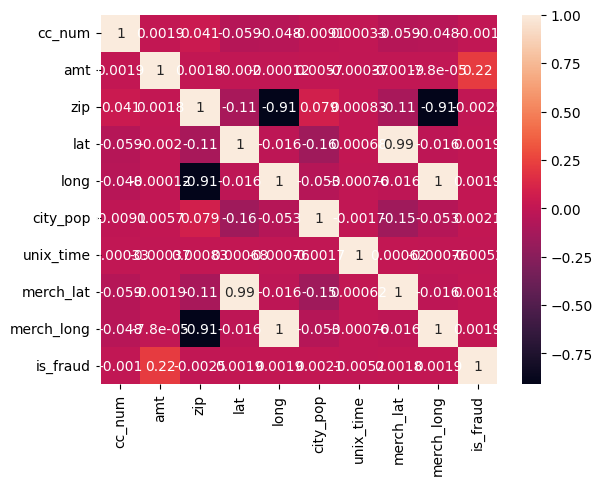

In [19]:
num_cols = df_train.select_dtypes(include = ['float64','int64'])
sns.heatmap(num_cols.corr(),annot = True)

**Correlation heatmap of data with added features**

<Axes: >

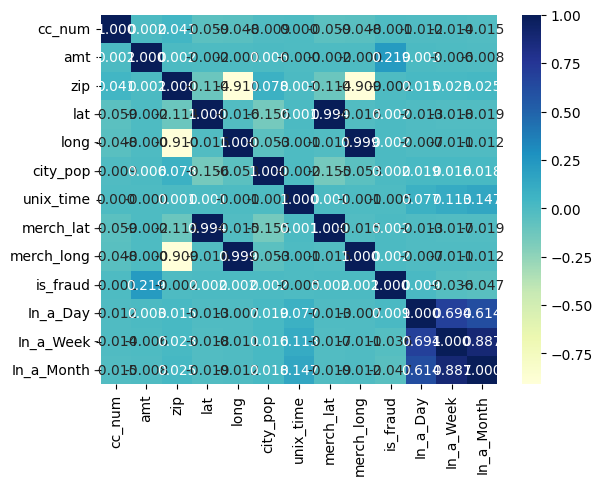

In [20]:
numeric_columns = df1dm.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True,fmt='.3f',cmap="YlGnBu")


# Frauds and Categories

In [21]:
""""
split-apply-combine
first it groups category and is_fraud then it selects is_fraud and counts it 
results in 
    is_fraud
cat1   0      2
       1      1
cat2   0      1
       1      1
unstacked so the 'is_fraud' gets converted into a single column
is_fraud    0    1
category
cat1        2    1
cat2        1    1
"""
cat_counts = df_train.groupby(['category','is_fraud'])['is_fraud'].count().unstack()
cat_counts

is_fraud,0,1
category,,
entertainment,97310,242
food_dining,94792,154
gas_transport,134262,630
grocery_net,46418,134
grocery_pos,125051,1789
health_fitness,89176,137
home,127836,212
kids_pets,117355,243
misc_net,64052,946


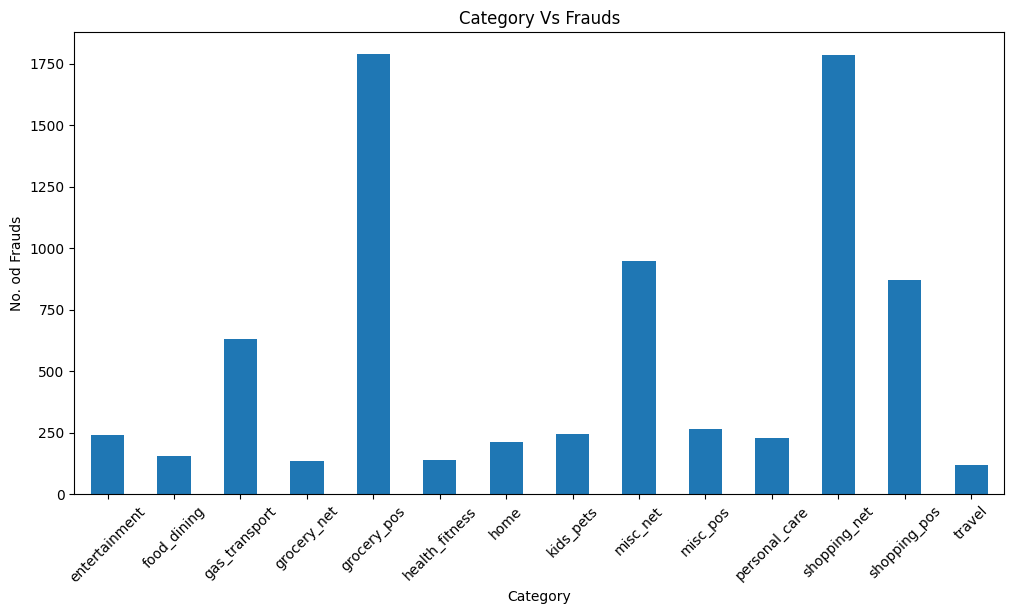

In [22]:
cat_counts_fraud = cat_counts[1]
ccc = cat_counts_fraud.plot(kind='bar', figsize=(12, 6))
ccc.set_ylabel('No. od Frauds')
ccc.set_xlabel('Category')
ccc.set_title('Category Vs Frauds')
plt.xticks(rotation=45)
plt.show()

**Grocery and Shopping are the categories with the most frauds.**

# Gender Wise Fraud

Text(0.5, 1.0, 'Bar Plot of is_fraud by Gender')

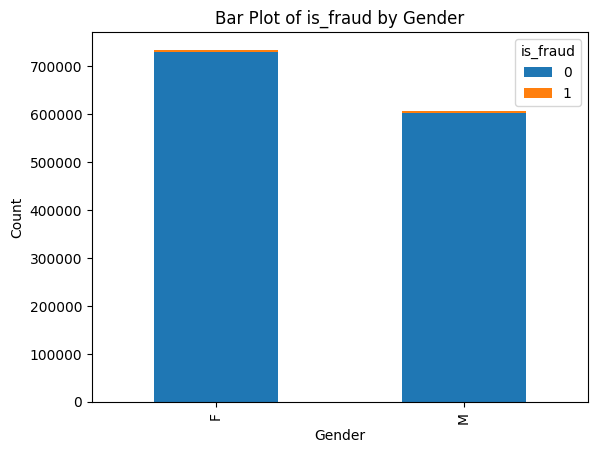

In [23]:
gen_counts = df_train.groupby(['gender','is_fraud'])['is_fraud'].count().unstack()
ax = gen_counts.plot(kind='bar', stacked=True)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Bar Plot of is_fraud by Gender')

**JUST A BIT DIFFERENT APPROACH**

In [24]:
gen_counts = df_train[df_train['is_fraud'] == 1].groupby('gender')['is_fraud'].count()
gen_counts

gender
F    3843
M    3911
Name: is_fraud, dtype: int64

Text(0.5, 1.0, 'Gender Vs Fraud')

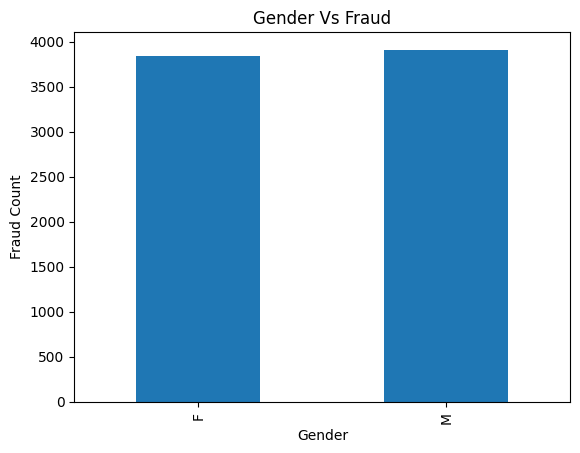

In [25]:
ax = gen_counts.plot(kind='bar')
ax.set_xlabel('Gender')
ax.set_ylabel('Fraud Count')
ax.set_title('Gender Vs Fraud')


**This provides no significant information since both genders have experienced almost equal number of frauds**

# Most common day of the week for fraud

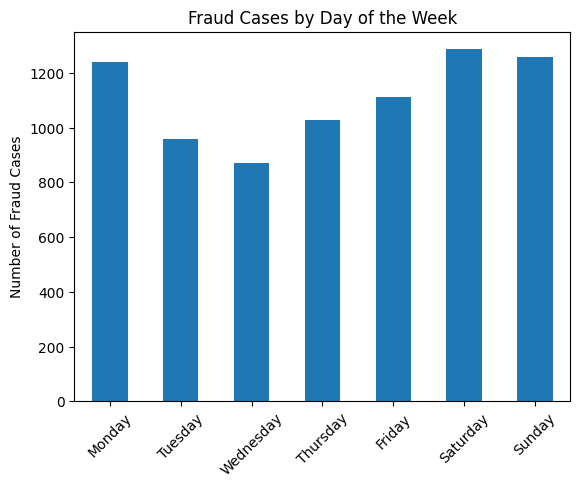

In [26]:
fraud_by_day = df_train[df_train['is_fraud']==1].groupby('Day_of_week')['is_fraud'].count()
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day.index=(day_labels)
fraud_by_day.plot(kind='bar')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Day of the Week')
plt.xticks(rotation = 45)
plt.show()

**Most fraud transactions occur during the weekend. Saturday and Sunday**

# Zip codes based fraud frequency

In [27]:
df_zip = df_train[df_train['is_fraud'] == 1].groupby('zip')['is_fraud'].count()
top_10_zip= df_zip.sort_values(ascending=False).head(10)
top_10_zip

zip
15010    25
48088    24
82514    21
16034    21
68375    20
55606    20
41812    19
95148    19
34112    19
37138    18
Name: is_fraud, dtype: int64

# City Vs Fraud

In [28]:
df_city = df_train[df_train['is_fraud'] == 1].groupby('city')['is_fraud'].count()
top_10_city= df_city.sort_values(ascending=False).head(10)
top_10_city

city
Houston       40
Warren        34
Naples        30
Huntsville    30
Detroit       27
Tulsa         27
Utica         27
Dallas        27
Topeka        27
Randolph      26
Name: is_fraud, dtype: int64

**Houston has the highest number of frauds occurence.**

**Merchants Vs Fraud**

In [29]:
df_mer = df_train[df_train['is_fraud'] == 1].groupby('merchant')['is_fraud'].count()
top_10_mer= df_mer.sort_values(ascending=False).head(10)
top_10_mer

merchant
fraud_Cormier LLC           54
fraud_Rau and Sons          51
fraud_Kozey-Boehm           51
fraud_Vandervort-Funk       48
fraud_Doyle Ltd             48
fraud_Kilback LLC           47
fraud_Kuhn LLC              46
fraud_Terry-Huel            45
fraud_Padberg-Welch         45
fraud_Gleason-Macejkovic    43
Name: is_fraud, dtype: int64

# Dropping few more columns, encoding categorical columns and scaling the columns with numeric values

In [30]:
X = df_train.drop(['zip','lat','long','unix_time','merch_lat','merch_long', 'dob', 'trans_date_trans_time'],axis=1)
X= pd.get_dummies(X,columns=['merchant', 'category', 'gender', 'street', 'city', 'state'])

In [31]:
from sklearn.preprocessing import MinMaxScaler
num_colss= ['amt', 'city_pop', 'Hour', 'Day_of_week', 'Month']
scaler = MinMaxScaler()
X[num_colss] = scaler.fit_transform(X[num_colss])

In [32]:
y = X["is_fraud"]
X = X.drop("is_fraud",axis=1) 

# Splitting into test and train data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state=40)

# Using Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [35]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

print("Score of X-train with Y-train is : ", dtc.score(X_train,y_train))
print("Score of X-test  with Y-test  is : ", dtc.score(X_test,y_test))

y_pred=dtc.predict(X_test)

print("Accuracy score " , accuracy_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Score of X-train with Y-train is :  1.0
Score of X-test  with Y-test  is :  0.9976735038560555
Accuracy score  0.9976735038560555
F1 score:  99.76 %


# Accuracy score  0.9976268993659925

In [37]:
"""
precision = true +ve/total predicted +ve s (how many predicted frauds are actual frauds)
recall = true +ve / total actual +ve s  (how many actual frauds were correctly classified as fraud)
f1 score = harmonic mean of precision and recall
support = no. of acual occurences of each class 
accuracy = correct prediction/ total predictions
"""
class_rep =classification_report(y_test,y_pred,labels=[1,0])

# print('Classification report : \n',class_rep)

Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.76      0.79      3066
           0       1.00      1.00      1.00    533363

    accuracy                           1.00    536429
   macro avg       0.91      0.88      0.89    536429
weighted avg       1.00      1.00      1.00    536429

